<a id='GoTop'></a>
#### References:
* http://www.nyayapati.com/srao/2014/05/how-to-install-numpy-scipy-pandas-matplotlib-and-scikit-learn-on-mavericks/ 
* https://github.com/pydata/pandas-datareader 

In [6]:
!pwd

/Users/kpadhikari/Desktop/BigFls/CLAS12/GitProj/KPAdhikari/PythonStuff/IPython_Jupyter_Notebooks


In [49]:
###!/usr/bin/env python3
"""
Created on Tue Sep  17 00:00:00 2019

@author: KPAdhikari
"""
from __future__ import print_function
import os.path
from os import path
import xlsxwriter
import json, math
import sys, os, fnmatch, platform

## Contents/Quick Links
* [pandas_datareader](#pandas_datareader)
* [Handling or Dealing with NANs in a Dataframe](#HandlingNansInDataframe)
* [Plotting directly from dataframes](#PlottingDirectlyFromDataframe)
* [Operating on data from multiple columns of dataframe and creating new columns from the results](#OperatingOnMultipleColumns) or Apply function using information from 2 or more columns
* 

<img src="http://pandas.pydata.org/_static/pandas_logo.png" style="width:400px;height:80px;">
# <font color='red'>Pandas Tutorial On Stock Price Analysis</font> 

*This tutorial will cover how to retrieve stock price from google finance using pandas data reader. The analysis of stock is done by plotting its high, low, close, volumne values in table and a chart. Charts are of two types,*

1. Line Chart
2. Bar Chart

If you don't know what is stock then first **watch this video to gain understanding on fundamentals of stocks and investing**,

In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/XRO6lEu9-5w" frameborder="0" allowfullscreen></iframe>

[GoTop](#GoTop) <a id='pandas_datareader'></a>
## pandas_datareader

In [2]:
import pandas_datareader as pdr
pdr.get_data_yahoo('AAPL')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.601469
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.647457
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.223597
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.175119
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.349140
2010-01-11,30.428572,29.778572,30.400000,30.015715,115557400.0,26.116703
2010-01-12,29.967142,29.488571,29.884285,29.674286,148614900.0,25.819624
2010-01-13,30.132856,29.157143,29.695715,30.092857,151473000.0,26.183823
2010-01-14,30.065714,29.860001,30.015715,29.918571,108223500.0,26.032179


In [5]:
import pandas as pd  #Not essential here, just for try
import numpy as np   #Not essential here, just for try
#import pandas.io.data as web
import pandas_datareader as web  #https://github.com/pydata/pandas-datareader
#from pandas_datareader import data as web

#df = web.DataReader('AAPL', 'google', '2016/1/1', '2017/1/1')
'''
ImmediateDeprecationError: 
Google finance has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues
'''
df = web.DataReader('AAPL', '2016/1/1')
df.head()

NotImplementedError: data_source='microsoft' is not implemented

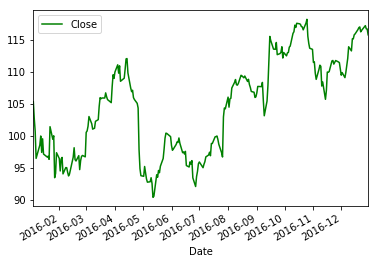

In [6]:
%matplotlib inline
df.plot(y="Close", color="Green")

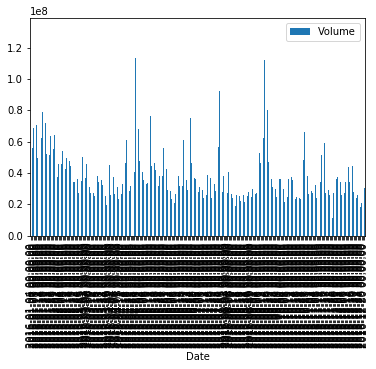

In [7]:
df.plot.bar(y="Volume")

In [8]:
%system ls

['jupyter_architecture.png',
 'jupyter_stocks.ipynb',
 'myFirstNotebook_kpa.ipynb',
 'myPandasTutorialWalkthrough1.ipynb',
 'pandas_tutorial_on_stock_price.ipynb',
 'pandas_tutorial_on_stock_price.py',
 'python_pandas_notebook.ipynb',
 'readme.txt']

[GoTop](#GoTop) <a id='HandlingNansInDataframe'></a>
## Handling or Dealing with NANs in a Dataframe

In [7]:
# https://stackoverflow.com/questions/45352909/pandas-indexingerror-unalignable-boolean-series-provided-as-indexer
import pandas as pd
import numpy as np

dfn = pd.DataFrame({'a':[1,3,np.nan,5.2, 1.7, np.nan], 'b':[4.3,np.nan,6.1, 35, 8.2, np.nan], 
                    'c':[np.nan, 2.6, 4, 8,9,np.nan], 'd':[1,2,np.nan,9, 7, np.nan], 
                    'e':[4.4,np.nan,6.2, np.nan,7.8, np.nan], 'f':[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]})
dfn.head()
#df = df[df.notnull().any(axis = 0)]
#print df

,a,b,c,d,e,f
0,1.0,4.3,NaN,1.0,4.4,NaN
1,3.0,NaN,2.6,2.0,NaN,NaN
2,NaN,6.1,4.0,NaN,6.2,NaN
3,5.2,35.0,8.0,9.0,NaN,NaN
4,1.7,8.2,9.0,7.0,7.8,NaN


In [8]:
print (dfn.notnull().any(axis = 0))

a     True
b     True
c     True
d     True
e     True
f    False
dtype: bool


In [9]:
dfn = dfn.loc[:, dfn.notnull().any(axis = 0)]
print (dfn)

     a     b    c    d    e
0  1.0   4.3  NaN  1.0  4.4
1  3.0   NaN  2.6  2.0  NaN
2  NaN   6.1  4.0  NaN  6.2
3  5.2  35.0  8.0  9.0  NaN
4  1.7   8.2  9.0  7.0  7.8
5  NaN   NaN  NaN  NaN  NaN


In [10]:
listA = dfn.loc[(dfn['c'] > 0.0) & (dfn['c'] > 2.0), 'a'].tolist()
print(listA)
listAn = dfn.loc[dfn['a'].notnull() & (dfn['c'] > 0.0) & (dfn['c'] > 2.0), 'a'].tolist()
print(listAn)
listDn = dfn.loc[dfn['a'].notnull() & (dfn['c'] > 0.0) & (dfn['c'] > 2.0), 'd'].tolist()
print(listDn)
listEn = dfn.loc[dfn['a'].notnull() & (dfn['c'] > 0.0) & (dfn['c'] > 2.0), 'e'].tolist()
print(listEn)

[3.0, nan, 5.2, 1.7]
[3.0, 5.2, 1.7]
[2.0, 9.0, 7.0]
[nan, nan, 7.8]


[GoTop](#GoTop) <a id='PlottingDirectlyFromDataframe'></a>
## Plotting directly from dataframes
(Following two cells are copied from http://localhost:8888/notebooks/KpInstalls/Geant4/ExamplesBld/HadronTherapyKp2/Test_Outputs_of_thisSimulation_HadrontherapyKp2.ipynb#)

In [18]:
import pandas as pd
# https://stackoverflow.com/questions/44729498/plotting-data-from-multiple-pandas-data-frames-in-one-plot
import numpy as np
#https://stackoverflow.com/questions/45467320/plot-multiple-pandas-dataframes-in-one-graph
import matplotlib.pyplot as plt 

dataFile = "/Users/kpadhikari/KpInstalls/Geant4/ExamplesBld/HadronTherapyKp2/Tmp/DoseV1.out"
# https://github.com/jupyter/notebook/issues/3805 
#data = pd.read_csv('output_list.txt', header = None)
#pd.read_csv('file.csv', delimiter=' ')
#pd.read_csv('addresses.csv')
#pd.read_csv("whitespace.csv", header=None, delimiter=r"\s+")
dataframe = pd.read_csv(dataFile,delim_whitespace=True) # works
#data = pd.read_csv('./TmpBkp_defMac/Dose.out', sep=" ", header=None) # doesn't work
#data = pd.read_csv('./TmpBkp_defMac/Dose.out', header=None, delimiter=r"\s+")  #works
df = dataframe
#print(dataframe)  #works (didn't want to print too much showing all rows)
df.head()

,i,j,k,Dose(Gy)
0,0,0,0,6.054910e-08
1,1,0,0,6.030820e-08
2,2,0,0,6.154180e-08
3,3,0,0,5.987870e-08
4,4,0,0,6.031540e-08


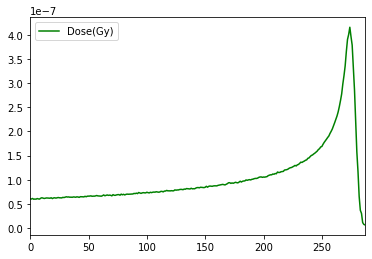

In [19]:
%matplotlib inline
df.plot(y='Dose(Gy)', color="Green")

[GoTop](#GoTop) <a id='OperatingOnMultipleColumns'></a>
## Operating on data from multiple columns of dataframe and creating new columns from the results

**In other words, apply a single function that takes as parameters elements from 2 (or more) columns.**

Ref: http://queirozf.com/entries/pandas-dataframe-examples-column-operations#apply-function-using-information-from-2-or-more-columns

Use 
```py 
df.apply(lambda row: ... , axis=1) 
```

Example: Find out if column word is in column text: 

In [11]:
import pandas as pd

df = pd.DataFrame({
    'text': ['foo bar','bar baz','baz quux','foo quux'],
    'word': ['foo','foo','bar','foo']
})

df.head()

,text,word
0,foo bar,foo
1,bar baz,foo
2,baz quux,bar
3,foo quux,foo


In [12]:
df['word_is_in_text'] = df[['text','word']].apply(lambda row: row['word'] in row['text'], axis=1)
df.head()

,text,word,word_is_in_text
0,foo bar,foo,True
1,bar baz,foo,False
2,baz quux,bar,False
3,foo quux,foo,True


#### Let me try similar and more on above dataframe 'dfn'.

(Additional ref: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o)

In [13]:
dfn.head()

,a,b,c,d,e
0,1.0,4.3,NaN,1.0,4.4
1,3.0,NaN,2.6,2.0,NaN
2,NaN,6.1,4.0,NaN,6.2
3,5.2,35.0,8.0,9.0,NaN
4,1.7,8.2,9.0,7.0,7.8


In [14]:
def addTwoColumns(row):
    if (row['a']==np.nan) | (row['b']==np.nan):
        return np.nan
    else:
        return float(row['a']) + float(row['b'])
    
dfn['a+b'] = dfn[['a','b']].apply(lambda row: addTwoColumns(row), axis=1)
dfn.head()

,a,b,c,d,e,a+b
0,1.0,4.3,NaN,1.0,4.4,5.3
1,3.0,NaN,2.6,2.0,NaN,NaN
2,NaN,6.1,4.0,NaN,6.2,NaN
3,5.2,35.0,8.0,9.0,NaN,40.2
4,1.7,8.2,9.0,7.0,7.8,9.9


In [15]:
def addAnyTwoColumns(row, colNm1, colNm2):
    if (row[colNm1]==np.nan) | (row[colNm2]==np.nan):
        return np.nan
    else:
        return float(row[colNm1]) + float(row[colNm2])

dfn['c+d'] = dfn[['c','d']].apply(lambda row: addAnyTwoColumns(row, 'c', 'd'), axis=1)
dfn.head()

,a,b,c,d,e,a+b,c+d
0,1.0,4.3,NaN,1.0,4.4,5.3,NaN
1,3.0,NaN,2.6,2.0,NaN,NaN,4.6
2,NaN,6.1,4.0,NaN,6.2,NaN,NaN
3,5.2,35.0,8.0,9.0,NaN,40.2,17.0
4,1.7,8.2,9.0,7.0,7.8,9.9,16.0


In [16]:
dfn['d'+'e'] = dfn[['d','e']].apply(lambda row: addAnyTwoColumns(row, 'd', 'e'), axis=1)
dfn.head()

,a,b,c,d,e,a+b,c+d,de
0,1.0,4.3,NaN,1.0,4.4,5.3,NaN,5.4
1,3.0,NaN,2.6,2.0,NaN,NaN,4.6,NaN
2,NaN,6.1,4.0,NaN,6.2,NaN,NaN,NaN
3,5.2,35.0,8.0,9.0,NaN,40.2,17.0,NaN
4,1.7,8.2,9.0,7.0,7.8,9.9,16.0,14.8


**See (here http://localhost:8888/notebooks/GitProj/KPAdhikari/EVMS_stuff/EVMS-stuff-py3.ipynb) how I used this idea to to read a big excel file with several columns related with proton-therapy data and then directly used data from the existing columns on a function to calculate new estimates for RBE, and its correlated and uncorrelated error and then create corresponding new columns (note that the correlation terms being negative, the correlated error is smaller in size than uncorrelated ones)**. Not to lose sight, I am copying the corresponding cells below:

### First creating a dataframe from the data table (in Excel file format).

In [25]:
#https://www.journaldev.com/33306/pandas-read_excel-reading-excel-file-in-python 
import pandas

dataFile = '/Users/kpadhikari/Desktop/BigFls/CLAS12/GitProj/KPAdhikari/EVMS_stuff/globalRBE_paperRBEaddedByHandJan2020LetGt0.xlsx'
#excel_data_df = pandas.read_excel('records.xlsx', sheet_name='Employees')
dfLetGt0 = pandas.read_excel(dataFile) #, sheet_name='Employees')

# print whole sheet data
#print(df)
dfLetGt0.head()

,cell_line,energy,let (keV/mu m),kp Comments,RBEpub0.1SF,RBEpubErr,modality,alpha,alpha_X,alpha_X_err,alpha_err,beta,beta_X,beta_X_err,beta_err,author,year,RBE
0,AG01522,220MeV,0.63,NaN,NaN,NaN,protons,0.660,0.635,0.047,0.079,0.101,0.10,0.034,0.062,Marshall,2016,1.024040
1,AG01522,220MeV,7.50,NaN,NaN,NaN,protons,1.253,0.635,0.047,0.133,0.096,0.10,0.034,0.139,Marshall,2016,1.578926
2,AG01522,220MeV,1.68,NaN,NaN,NaN,protons,0.723,0.635,0.047,0.024,0.126,0.10,0.034,0.020,Marshall,2016,1.131389
3,AG01522,220MeV,2.45,NaN,NaN,NaN,protons,0.798,0.635,0.047,0.022,0.156,0.10,0.034,0.019,Marshall,2016,1.253248
4,V79-WNRE,230MeV,1.03,NaN,1.069,0.012,protons,0.103,0.072,0.004,0.016,0.051,0.05,0.007,0.003,Wouters,2015,1.055195


### Next defining the multi-arg functions to be used on several columns.
I am defining 3 different functions, one for RBE, another for RBEerrUncorrelated and the third for RBEerrCorrelated.

In [40]:
#This will return RBE
# We use the following formula for RBE, 
#       RBE = f(x,y,u,v) = ((sqrt(x^2 - 4uc) - x)/(sqrt(y^2 - 4vc) - y))*(v/u)
#           where,
#          x = alpha_X,   y = alpha_P,  u = beta_X, v = beta_P and c = lnSF (with SF=0.1 usually)
#
def CalcRBE4dfCol(row): #, 'alpha_X', 'alpha', 'beta_X', 'beta'):
    if (row['alpha_X']==np.nan) | (row['alpha']==np.nan) | (row['beta_X']==np.nan) | (row['beta']==np.nan):
        return np.nan
    else:
        alphaP = float(row['alpha'])
        alphaX = float(row['alpha_X'])
        betaP = float(row['beta'])
        betaX = float(row['beta_X'])
        '''
        alphaXerr = 0.0
        alphaPerr = 0.0
        betaXerr = 0.0
        betaPerr = 0.0
        rbe = CalcRBE(alphaX, alphaP, betaX, betaP, alphaXerr, alphaPerr, betaXerr, betaPerr)
        return rbe
        '''
    
    
        lnSF = math.log(0.1) #natural log of SF = 0.1 (SF = 10%)

        sqrtNumer = math.sqrt(alphaX * alphaX - 4*betaX*lnSF)
        sqrtDenom = math.sqrt(alphaP * alphaP - 4*betaP*lnSF)
        RBEnumer = (sqrtNumer - alphaX) * betaP
        RBEdenom = (sqrtDenom - alphaP) * betaX
        if RBEdenom == 0:
            return np.nan
        else:
            RBE = RBEnumer/RBEdenom  
            return RBE

In [41]:
#This will return Uncorrelated Error on RBE and will be directly used on dataframe columns.  

# We use the following formula for RBE, 
#       RBE = f(x,y,u,v) = ((sqrt(x^2 - 4uc) - x)/(sqrt(y^2 - 4vc) - y))*(v/u)
#           where,
#          x = alpha_X,   y = alpha_P,  u = beta_X, v = beta_P and c = lnSF (with SF=0.1 usually)
#

    # Let's denote the partial dervatives of f(x,y,u,v) as dfdx, dfdy, and dfdz and the variable errors 
    #        are dx, dy, du and dv
    #     Next, let's denote dfdx*dx = Dfx, dfdy*dy = Dfy, dfdu*du = Dfu and dfdv*dv = Dfv
    #
    #
    #
    # Uncorrelated Errors of f(x,y,u,v)
    #
    #           DfUncorr = sqrt ( (dfdx * dx)^2  + (dfdy * dy)^2 + (dfdu * du)^2 + (dfdv * dv)^2 )
    #                    = sqrt (Dfx^2 + Dfy^2 + Dfu^2 + Dfv^2)
    #
    # Correlelated Error
    #
    #           DfCorr   = sqrt ( DfUnCorr^2  +  2*(Dfx*Dfy + Dfx*Dfu + Dfx*Dfv + Dfy*Dfu + Dfy*Dfv + Dfu*Dfv))
    #                             
    #
    
def CalcRBEerrUncorr4dfCol(row):
    if (row['alpha_X']==np.nan) | (row['alpha']==np.nan) | (row['beta_X']==np.nan) | (row['beta']==np.nan) | \
       (row['alpha_X_err']==np.nan) | (row['alpha_err']==np.nan) | (row['beta_X_err']==np.nan) | (row['beta_err']==np.nan):
        return np.nan
    else:
        alphaP = float(row['alpha'])
        alphaX = float(row['alpha_X'])
        betaP = float(row['beta'])
        betaX = float(row['beta_X'])
        alphaPerr = float(row['alpha_err'])
        alphaXerr = float(row['alpha_X_err'])
        betaPerr = float(row['beta_err'])
        betaXerr = float(row['beta_X_err'])
        
        lnSF = math.log(0.1) #natural log of SF = 0.1 (SF = 10%)

        sqrtNumer = math.sqrt(alphaX * alphaX - 4*betaX*lnSF)
        sqrtDenom = math.sqrt(alphaP * alphaP - 4*betaP*lnSF)
        RBEnumer = (sqrtNumer - alphaX) * betaP
        RBEdenom = (sqrtDenom - alphaP) * betaX

        if (RBEdenom == 0) | (sqrtNumer ==0) | (sqrtDenom ==0) | (betaX == 0) | (betaP == 0)  | (alphaX == 0) | (alphaP == 0):
            return np.nan
        else:
            # Now let's evaluate the uncorrelated errors
            # Let's say alpha_x = x, alpha_p = y, beta_x = u, beta_p = v, lnSF = c, RBE = f
            #  Then RBE-err = Delta f = sqrt( (df/dx)^2*Dx^2 + (df/dy)^2*Dy^2 + (df/du)^2*Du^2 + (df/dv)^2*Dv^2 )
            dfdx = ( alphaX/sqrtNumer - 1.0) * (betaP/betaX)* 1.0/(sqrtDenom - alphaP)
            dfdy = -1.0 * (betaP/betaX)* (alphaP/sqrtDenom - 1.0) * (sqrtNumer - alphaX) / (math.pow((sqrtDenom - alphaP), 2))
            dfdu = -(betaP/math.pow(betaX,2)) * (sqrtNumer - alphaX)/(sqrtDenom - alphaP) \
                   - 2*betaP*lnSF/(sqrtNumer*(sqrtDenom - alphaP))
            dfdv = (1.0/betaX)*(sqrtNumer - alphaX)/(sqrtDenom - alphaP) \
                   + (2*betaP*lnSF/betaX) * (sqrtNumer - alphaX)/(math.pow((sqrtDenom - alphaP),2)*sqrtDenom)

            Dfx = dfdx*alphaXerr
            Dfy = dfdy*alphaPerr
            Dfu = dfdu*betaXerr
            Dfv = dfdv*betaPerr
            RBEerrorUncorr = math.sqrt( math.pow(Dfx,2) + math.pow(Dfy,2) + math.pow(Dfu,2)  + math.pow(Dfv,2))
            RBEerrorCorr = math.sqrt( math.pow(RBEerrorUncorr,2) +
                                     2*(Dfx*Dfy + Dfx*Dfu + Dfx*Dfv + Dfy*Dfu + Dfy*Dfv + Dfu*Dfv))

            return RBEerrorUncorr

In [42]:
#This one returns Correlated error on RBE
def CalcRBEerrCorr4dfCol(row):
    if (row['alpha_X']==np.nan) | (row['alpha']==np.nan) | (row['beta_X']==np.nan) | (row['beta']==np.nan) | \
       (row['alpha_X_err']==np.nan) | (row['alpha_err']==np.nan) | (row['beta_X_err']==np.nan) | (row['beta_err']==np.nan):
        return np.nan
    else:
        alphaP = float(row['alpha'])
        alphaX = float(row['alpha_X'])
        betaP = float(row['beta'])
        betaX = float(row['beta_X'])
        alphaPerr = float(row['alpha_err'])
        alphaXerr = float(row['alpha_X_err'])
        betaPerr = float(row['beta_err'])
        betaXerr = float(row['beta_X_err'])
        
        lnSF = math.log(0.1) #natural log of SF = 0.1 (SF = 10%)

        sqrtNumer = math.sqrt(alphaX * alphaX - 4*betaX*lnSF)
        sqrtDenom = math.sqrt(alphaP * alphaP - 4*betaP*lnSF)
        RBEnumer = (sqrtNumer - alphaX) * betaP
        RBEdenom = (sqrtDenom - alphaP) * betaX

        if (RBEdenom == 0) | (sqrtNumer ==0) | (sqrtDenom ==0) | (betaX == 0) | (betaP == 0)  | (alphaX == 0) | (alphaP == 0):
            return np.nan
        else:
            # Now let's evaluate the uncorrelated errors
            # Let's say alpha_x = x, alpha_p = y, beta_x = u, beta_p = v, lnSF = c, RBE = f
            #  Then RBE-err = Delta f = sqrt( (df/dx)^2*Dx^2 + (df/dy)^2*Dy^2 + (df/du)^2*Du^2 + (df/dv)^2*Dv^2 )
            dfdx = ( alphaX/sqrtNumer - 1.0) * (betaP/betaX)* 1.0/(sqrtDenom - alphaP)
            dfdy = -1.0 * (betaP/betaX)* (alphaP/sqrtDenom - 1.0) * (sqrtNumer - alphaX) / (math.pow((sqrtDenom - alphaP), 2))
            dfdu = -(betaP/math.pow(betaX,2)) * (sqrtNumer - alphaX)/(sqrtDenom - alphaP) \
                   - 2*betaP*lnSF/(sqrtNumer*(sqrtDenom - alphaP))
            dfdv = (1.0/betaX)*(sqrtNumer - alphaX)/(sqrtDenom - alphaP) \
                   + (2*betaP*lnSF/betaX) * (sqrtNumer - alphaX)/(math.pow((sqrtDenom - alphaP),2)*sqrtDenom)

            Dfx = dfdx*alphaXerr
            Dfy = dfdy*alphaPerr
            Dfu = dfdu*betaXerr
            Dfv = dfdv*betaPerr
            RBEerrorUncorr = math.sqrt( math.pow(Dfx,2) + math.pow(Dfy,2) + math.pow(Dfu,2)  + math.pow(Dfv,2))
            RBEerrorCorr = math.sqrt( math.pow(RBEerrorUncorr,2) +
                                     2*(Dfx*Dfy + Dfx*Dfu + Dfx*Dfv + Dfy*Dfu + Dfy*Dfv + Dfu*Dfv))

            return RBEerrorCorr

In [43]:
df4Xl = dfLetGt0
df4Xl.head()

,cell_line,energy,let (keV/mu m),kp Comments,RBEpub0.1SF,RBEpubErr,modality,alpha,alpha_X,alpha_X_err,alpha_err,beta,beta_X,beta_X_err,beta_err,author,year,RBE,RBEn,RBE_errUncorr
0,AG01522,220MeV,0.63,NaN,NaN,NaN,protons,0.660,0.635,0.047,0.079,0.101,0.10,0.034,0.062,Marshall,2016,1.024040,1.024040,0.358330
1,AG01522,220MeV,7.50,NaN,NaN,NaN,protons,1.253,0.635,0.047,0.133,0.096,0.10,0.034,0.139,Marshall,2016,1.578926,1.578926,0.565409
2,AG01522,220MeV,1.68,NaN,NaN,NaN,protons,0.723,0.635,0.047,0.024,0.126,0.10,0.034,0.020,Marshall,2016,1.131389,1.131389,0.360631
3,AG01522,220MeV,2.45,NaN,NaN,NaN,protons,0.798,0.635,0.047,0.022,0.156,0.10,0.034,0.019,Marshall,2016,1.253248,1.253248,0.398280
4,V79-WNRE,230MeV,1.03,NaN,1.069,0.012,protons,0.103,0.072,0.004,0.016,0.051,0.05,0.007,0.003,Wouters,2015,1.055195,1.055195,0.148201


**Now, passing the values of alphaP, betaP, alphaX and betaX from each row (if they exist or 'not-NAN') of the dataframe and adding the result (even if it doesn't exist, put it as NAN) onto a new column at the end.**

In [45]:
#df4Xl['RBEn'] = df4Xl[['alpha','beta', 'alpha_X', 'beta_X']].apply(lambda row: CalcRBE4dfCol(row), axis=1) #works
df4Xl['RBEn'] = df4Xl.apply(lambda row: CalcRBE4dfCol(row), axis=1) #also works
df4Xl.head()

,cell_line,energy,let (keV/mu m),kp Comments,RBEpub0.1SF,RBEpubErr,modality,alpha,alpha_X,alpha_X_err,alpha_err,beta,beta_X,beta_X_err,beta_err,author,year,RBE,RBEn,RBE_errUncorr
0,AG01522,220MeV,0.63,NaN,NaN,NaN,protons,0.660,0.635,0.047,0.079,0.101,0.10,0.034,0.062,Marshall,2016,1.024040,1.024040,0.358330
1,AG01522,220MeV,7.50,NaN,NaN,NaN,protons,1.253,0.635,0.047,0.133,0.096,0.10,0.034,0.139,Marshall,2016,1.578926,1.578926,0.565409
2,AG01522,220MeV,1.68,NaN,NaN,NaN,protons,0.723,0.635,0.047,0.024,0.126,0.10,0.034,0.020,Marshall,2016,1.131389,1.131389,0.360631
3,AG01522,220MeV,2.45,NaN,NaN,NaN,protons,0.798,0.635,0.047,0.022,0.156,0.10,0.034,0.019,Marshall,2016,1.253248,1.253248,0.398280
4,V79-WNRE,230MeV,1.03,NaN,1.069,0.012,protons,0.103,0.072,0.004,0.016,0.051,0.05,0.007,0.003,Wouters,2015,1.055195,1.055195,0.148201


In [46]:
df4Xl['RBE_errUncorr'] = df4Xl.apply(lambda row: CalcRBEerrUncorr4dfCol(row), axis=1)
df4Xl.head()

,cell_line,energy,let (keV/mu m),kp Comments,RBEpub0.1SF,RBEpubErr,modality,alpha,alpha_X,alpha_X_err,alpha_err,beta,beta_X,beta_X_err,beta_err,author,year,RBE,RBEn,RBE_errUncorr
0,AG01522,220MeV,0.63,NaN,NaN,NaN,protons,0.660,0.635,0.047,0.079,0.101,0.10,0.034,0.062,Marshall,2016,1.024040,1.024040,0.358330
1,AG01522,220MeV,7.50,NaN,NaN,NaN,protons,1.253,0.635,0.047,0.133,0.096,0.10,0.034,0.139,Marshall,2016,1.578926,1.578926,0.565409
2,AG01522,220MeV,1.68,NaN,NaN,NaN,protons,0.723,0.635,0.047,0.024,0.126,0.10,0.034,0.020,Marshall,2016,1.131389,1.131389,0.360631
3,AG01522,220MeV,2.45,NaN,NaN,NaN,protons,0.798,0.635,0.047,0.022,0.156,0.10,0.034,0.019,Marshall,2016,1.253248,1.253248,0.398280
4,V79-WNRE,230MeV,1.03,NaN,1.069,0.012,protons,0.103,0.072,0.004,0.016,0.051,0.05,0.007,0.003,Wouters,2015,1.055195,1.055195,0.148201


In [47]:
df4Xl['RBE_errCorr'] = df4Xl.apply(lambda row: CalcRBEerrCorr4dfCol(row), axis=1)
df4Xl.head()
#print(df4Xl)

,cell_line,energy,let (keV/mu m),kp Comments,RBEpub0.1SF,RBEpubErr,modality,alpha,alpha_X,alpha_X_err,...,beta,beta_X,beta_X_err,beta_err,author,year,RBE,RBEn,RBE_errUncorr,RBE_errCorr
0,AG01522,220MeV,0.63,NaN,NaN,NaN,protons,0.660,0.635,0.047,...,0.101,0.10,0.034,0.062,Marshall,2016,1.024040,1.024040,0.358330,0.156953
1,AG01522,220MeV,7.50,NaN,NaN,NaN,protons,1.253,0.635,0.047,...,0.096,0.10,0.034,0.139,Marshall,2016,1.578926,1.578926,0.565409,0.196808
2,AG01522,220MeV,1.68,NaN,NaN,NaN,protons,0.723,0.635,0.047,...,0.126,0.10,0.034,0.020,Marshall,2016,1.131389,1.131389,0.360631,0.340351
3,AG01522,220MeV,2.45,NaN,NaN,NaN,protons,0.798,0.635,0.047,...,0.156,0.10,0.034,0.019,Marshall,2016,1.253248,1.253248,0.398280,0.391056
4,V79-WNRE,230MeV,1.03,NaN,1.069,0.012,protons,0.103,0.072,0.004,...,0.051,0.05,0.007,0.003,Wouters,2015,1.055195,1.055195,0.148201,0.099046


In [48]:
# Now dumping the updated (with 3 new columns) onto a new Excel file.
df4Xl.to_excel("rbeAndErrors_DumpedFromDataframeUsing_to_excel.xlsx")  